<a href="https://colab.research.google.com/github/lucaskmiyazaki/optimization/blob/master/pyplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy import linalg as la
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
H = np.array([[-6, 0], [0, 6]])
print(H)

[[-6  0]
 [ 0  6]]


In [0]:
w, v = la.eig(H)
print(w)

[-6.  6.]


In [0]:
def F(x1, x2):
  return x1**3 + x2**3 - 3*x1 - 3*x2

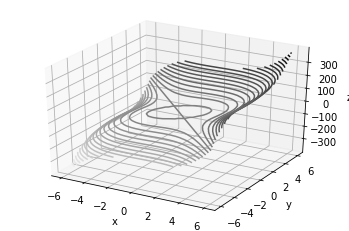

In [0]:
def f(x, y):
    return x**3 + y**3 - 3*x - 3*y

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

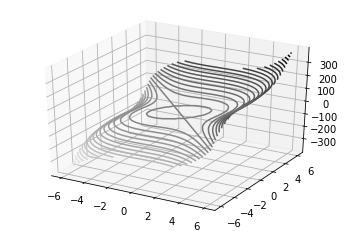

<Figure size 432x288 with 0 Axes>

In [0]:
# plot 3d
ax = plt.axes(projection='3d')
plt.figure()

# evenly sampled time at 200ms intervals from 0 to 5s
#F = np.arange(0., 5., 0.2)
x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x1, x2)
Z = F(X, Y)

# Data for a three-dimensional 
ax.contour3D(X, Y, Z,  50, cmap='binary')

# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--')
plt.show()

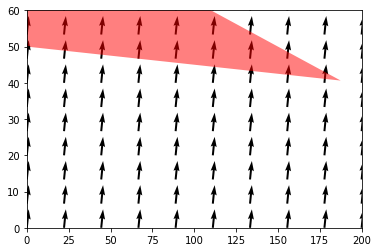

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import sympy

# find domain from inequalities
def f1(x):
    return -0.05*x+50
def f2(x):
    return -0.25*x+87.5
def f3(x):
    return 1000000*x

# fill domain region
x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))
y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

# trace border lines
xr = np.linspace(0.0,2.0,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)
plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
#plt.plot(xr,y3r,'k--')
plt.xlim(0.0,200) # x>0
plt.ylim(0.0,60) # y>0

# define gradient
x,y=sympy.symbols('x y')
fun= x + 10*y

# take the gradient symbolically
gradfun=[sympy.diff(fun,var) for var in (x,y)]

# turn into a bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun)

X,Y=np.meshgrid(np.linspace(0,200,10),np.linspace(0,60, 10))
graddat=numgradfun(X,Y)

#plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])

plt.show()